<a href="https://colab.research.google.com/github/Arroxkun/G11_Intro2CS_Project/blob/task2/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
import pandas as pd
weather = pd.read_csv("/content/drive/MyDrive/Weather_dataset/BerlinGermany.csv", index_col="datetime")

In [133]:
weather

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2021-03-01,"Berlin,Germany",8.9,1.6,4.7,8.3,-0.2,3.0,1.5,80.8,0.000,...,8.2,5,NaN,2021-03-01T06:52:42,2021-03-01T17:45:49,0.57,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"00427,00420,03987,00403,E2835,00433,00400"
2021-03-02,"Berlin,Germany",13.1,-1.7,3.7,13.1,-3.5,3.3,0.4,81.6,0.000,...,9.0,5,NaN,2021-03-02T06:50:27,2021-03-02T17:47:39,0.61,Clear,Clear conditions throughout the day.,clear-day,"00427,00420,03987,00403,E2835,00433,00400"
2021-03-03,"Berlin,Germany",13.9,-0.2,6.5,13.9,-2.5,5.5,1.9,74.7,0.000,...,10.7,5,NaN,2021-03-03T06:48:12,2021-03-03T17:49:29,0.65,Clear,Clear conditions throughout the day.,clear-day,"00427,00420,03987,00403,E2835,00433,00400"
2021-03-04,"Berlin,Germany",8.3,2.5,4.0,5.5,-1.3,0.5,1.3,83.2,0.138,...,1.6,1,NaN,2021-03-04T06:45:57,2021-03-04T17:51:19,0.68,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"00427,00420,03987,00403,E2835,00433,00400"
2021-03-05,"Berlin,Germany",5.9,-2.0,1.8,2.3,-5.9,-1.7,-4.1,68.2,0.010,...,11.5,6,NaN,2021-03-05T06:43:41,2021-03-05T17:53:09,0.72,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"00427,00420,03987,00430,00403,E2835,00433,00400"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-07,"Berlin,Germany",12.5,7.8,9.8,12.5,5.4,8.3,6.3,79.1,0.014,...,4.6,4,10.0,2023-11-07T07:13:07,2023-11-07T16:26:30,0.81,"Rain, Partially cloudy",Becoming cloudy in the afternoon with late aft...,rain,"00427,07389,03987,00403,E2835,00433,00400"
2023-11-08,"Berlin,Germany",11.3,7.2,8.8,11.3,4.4,7.0,5.5,79.9,0.393,...,3.0,2,10.0,2023-11-08T07:14:58,2023-11-08T16:24:47,0.84,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"00427,07389,03987,00403,E2835,00433,00400"
2023-11-09,"Berlin,Germany",11.9,6.3,9.5,11.9,4.1,8.4,4.7,72.4,0.035,...,2.8,2,10.0,2023-11-09T07:16:48,2023-11-09T16:23:07,0.87,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"00427,07389,03987,00403,E2835,00433,00400"


In [134]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

name                0.000000
tempmax             0.000000
tempmin             0.000000
temp                0.000000
feelslikemax        0.000000
feelslikemin        0.000000
feelslike           0.000000
dew                 0.000000
humidity            0.000000
precip              0.000000
precipprob          0.000000
precipcover         0.000000
preciptype          0.396552
snow                0.000000
snowdepth           0.000000
windgust            0.319473
windspeed           0.000000
winddir             0.000000
sealevelpressure    0.000000
cloudcover          0.000000
visibility          0.000000
solarradiation      0.000000
solarenergy         0.000000
uvindex             0.000000
severerisk          0.319473
sunrise             0.000000
sunset              0.000000
moonphase           0.000000
conditions          0.000000
description         0.000000
icon                0.000000
stations            0.000000
dtype: float64

In [44]:
valid_columns = weather.columns[null_pct < .03]

In [45]:
valid_columns

Index(['name', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon',
       'stations'],
      dtype='object')

In [ ]:
weather.apply(lambda x: (x == 9999).sum())

In [ ]:
weather.dtypes

In [ ]:
weather.index

Index(['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05',
       '2021-03-06', '2021-03-07', '2021-03-08', '2021-03-09', '2021-03-10',
       ...
       '2023-11-02', '2023-11-03', '2023-11-04', '2023-11-05', '2023-11-06',
       '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10', '2023-11-11'],
      dtype='object', name='datetime', length=986)

In [ ]:
weather.index = pd.to_datetime(weather.index)

In [ ]:
weather.index.year.value_counts().sort_index( )

2021    306
2022    365
2023    315
Name: datetime, dtype: int64

<Axes: xlabel='datetime'>

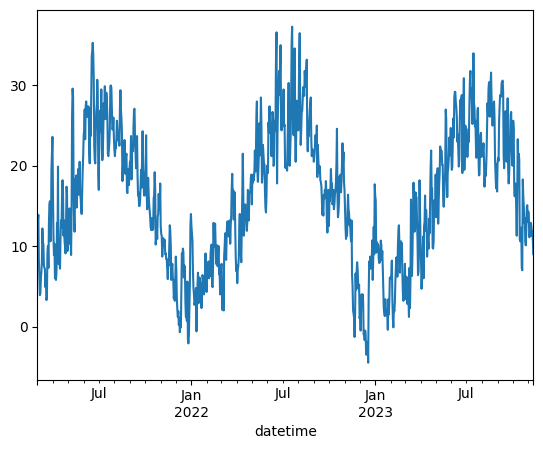

In [ ]:
weather ["tempmax"].plot()

In [ ]:
weather["target"] = weather.shift(-1)["tempmax"]

In [ ]:
weather

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,target
datetime,,,,,,,,,,,,,,,,,,,,,
2021-03-01,"Berlin,Germany",8.9,1.6,4.7,8.3,-0.2,3.0,1.5,80.8,0.000,...,5,NaN,2021-03-01T06:52:42,2021-03-01T17:45:49,0.57,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"00427,00420,03987,00403,E2835,00433,00400",13.1
2021-03-02,"Berlin,Germany",13.1,-1.7,3.7,13.1,-3.5,3.3,0.4,81.6,0.000,...,5,NaN,2021-03-02T06:50:27,2021-03-02T17:47:39,0.61,Clear,Clear conditions throughout the day.,clear-day,"00427,00420,03987,00403,E2835,00433,00400",13.9
2021-03-03,"Berlin,Germany",13.9,-0.2,6.5,13.9,-2.5,5.5,1.9,74.7,0.000,...,5,NaN,2021-03-03T06:48:12,2021-03-03T17:49:29,0.65,Clear,Clear conditions throughout the day.,clear-day,"00427,00420,03987,00403,E2835,00433,00400",8.3
2021-03-04,"Berlin,Germany",8.3,2.5,4.0,5.5,-1.3,0.5,1.3,83.2,0.138,...,1,NaN,2021-03-04T06:45:57,2021-03-04T17:51:19,0.68,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"00427,00420,03987,00403,E2835,00433,00400",5.9
2021-03-05,"Berlin,Germany",5.9,-2.0,1.8,2.3,-5.9,-1.7,-4.1,68.2,0.010,...,6,NaN,2021-03-05T06:43:41,2021-03-05T17:53:09,0.72,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"00427,00420,03987,00430,00403,E2835,00433,00400",3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-07,"Berlin,Germany",12.5,7.8,9.8,12.5,5.4,8.3,6.3,79.1,0.014,...,4,10.0,2023-11-07T07:13:07,2023-11-07T16:26:30,0.81,"Rain, Partially cloudy",Becoming cloudy in the afternoon with late aft...,rain,"00427,07389,03987,00403,E2835,00433,00400",11.3
2023-11-08,"Berlin,Germany",11.3,7.2,8.8,11.3,4.4,7.0,5.5,79.9,0.393,...,2,10.0,2023-11-08T07:14:58,2023-11-08T16:24:47,0.84,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"00427,07389,03987,00403,E2835,00433,00400",11.9
2023-11-09,"Berlin,Germany",11.9,6.3,9.5,11.9,4.1,8.4,4.7,72.4,0.035,...,2,10.0,2023-11-09T07:16:48,2023-11-09T16:23:07,0.87,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"00427,07389,03987,00403,E2835,00433,00400",10.7


In [ ]:
weather = weather.ffill()
weather

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,target
datetime,,,,,,,,,,,,,,,,,,,,,
2021-03-01,"Berlin,Germany",8.9,1.6,4.7,8.3,-0.2,3.0,1.5,80.8,0.000,...,5,NaN,2021-03-01T06:52:42,2021-03-01T17:45:49,0.57,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"00427,00420,03987,00403,E2835,00433,00400",13.1
2021-03-02,"Berlin,Germany",13.1,-1.7,3.7,13.1,-3.5,3.3,0.4,81.6,0.000,...,5,NaN,2021-03-02T06:50:27,2021-03-02T17:47:39,0.61,Clear,Clear conditions throughout the day.,clear-day,"00427,00420,03987,00403,E2835,00433,00400",13.9
2021-03-03,"Berlin,Germany",13.9,-0.2,6.5,13.9,-2.5,5.5,1.9,74.7,0.000,...,5,NaN,2021-03-03T06:48:12,2021-03-03T17:49:29,0.65,Clear,Clear conditions throughout the day.,clear-day,"00427,00420,03987,00403,E2835,00433,00400",8.3
2021-03-04,"Berlin,Germany",8.3,2.5,4.0,5.5,-1.3,0.5,1.3,83.2,0.138,...,1,NaN,2021-03-04T06:45:57,2021-03-04T17:51:19,0.68,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"00427,00420,03987,00403,E2835,00433,00400",5.9
2021-03-05,"Berlin,Germany",5.9,-2.0,1.8,2.3,-5.9,-1.7,-4.1,68.2,0.010,...,6,NaN,2021-03-05T06:43:41,2021-03-05T17:53:09,0.72,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"00427,00420,03987,00430,00403,E2835,00433,00400",3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-07,"Berlin,Germany",12.5,7.8,9.8,12.5,5.4,8.3,6.3,79.1,0.014,...,4,10.0,2023-11-07T07:13:07,2023-11-07T16:26:30,0.81,"Rain, Partially cloudy",Becoming cloudy in the afternoon with late aft...,rain,"00427,07389,03987,00403,E2835,00433,00400",11.3
2023-11-08,"Berlin,Germany",11.3,7.2,8.8,11.3,4.4,7.0,5.5,79.9,0.393,...,2,10.0,2023-11-08T07:14:58,2023-11-08T16:24:47,0.84,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"00427,07389,03987,00403,E2835,00433,00400",11.9
2023-11-09,"Berlin,Germany",11.9,6.3,9.5,11.9,4.1,8.4,4.7,72.4,0.035,...,2,10.0,2023-11-09T07:16:48,2023-11-09T16:23:07,0.87,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"00427,07389,03987,00403,E2835,00433,00400",10.7


In [ ]:
weather.corr()

In [141]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=.1)

In [142]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station","preciptype","sunrise","sunset","conditions", "description", "icon","stations"])]

In [143]:
predictors

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'moonphase'],
      dtype='object')

In [144]:
def backtest(weather, model, predictors, start=30, step=10):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [ ]:
weather= weather.fillna(0)

In [ ]:
predictions = backtest(weather, rr, predictors)

In [ ]:
predictions

,actual,prediction,diff
datetime,,,
2021-03-31,16.6,18.187730,1.587730
2021-04-01,11.3,20.820523,9.520523
2021-04-02,8.9,23.069552,14.169552
2021-04-03,10.3,14.762901,4.462901
2021-04-04,6.0,19.309707,13.309707
...,...,...,...
2023-11-07,11.3,12.311612,1.011612
2023-11-08,11.9,11.492334,0.407666
2023-11-09,10.7,11.451063,0.751063


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

2.4396522252467996

In [ ]:
predictions["diff"].mean()

2.4396522252467996

In [ ]:
pd.Series(rr.coef_, index=predictors)

In [ ]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 10]
for horizon in rolling_horizons:
    for col in ["tempmax", "tempmin", "precip"]:
        weather = compute_rolling(weather, horizon, col)

In [ ]:
weather

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,rolling_3_tempmin,rolling_3_tempmin_pct,rolling_3_precip,rolling_3_precip_pct,rolling_10_tempmax,rolling_10_tempmax_pct,rolling_10_tempmin,rolling_10_tempmin_pct,rolling_10_precip,rolling_10_precip_pct
datetime,,,,,,,,,,,,,,,,,,,,,
2021-03-01,"Berlin,Germany",8.9,1.6,4.7,8.3,-0.2,3.0,1.5,80.8,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-02,"Berlin,Germany",13.1,-1.7,3.7,13.1,-3.5,3.3,0.4,81.6,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-03,"Berlin,Germany",13.9,-0.2,6.5,13.9,-2.5,5.5,1.9,74.7,0.000,...,-0.100000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-04,"Berlin,Germany",8.3,2.5,4.0,5.5,-1.3,0.5,1.3,83.2,0.138,...,0.200000,11.500000,0.046000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-05,"Berlin,Germany",5.9,-2.0,1.8,2.3,-5.9,-1.7,-4.1,68.2,0.010,...,0.100000,-21.000000,0.049333,-0.797297,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-07,"Berlin,Germany",12.5,7.8,9.8,12.5,5.4,8.3,6.3,79.1,0.014,...,8.466667,-0.078740,2.794333,-0.994990,13.16,-0.050152,8.24,-0.053398,2.6242,-0.994665
2023-11-08,"Berlin,Germany",11.3,7.2,8.8,11.3,4.4,7.0,5.5,79.9,0.393,...,8.133333,-0.114754,0.188333,1.086726,12.80,-0.117188,8.10,-0.111111,1.9108,-0.794327
2023-11-09,"Berlin,Germany",11.9,6.3,9.5,11.9,4.1,8.4,4.7,72.4,0.035,...,7.100000,-0.112676,0.147333,-0.762443,12.48,-0.046474,7.59,-0.169960,1.9143,-0.981717


In [ ]:
weather = weather.iloc[10:,:]

In [ ]:
weather

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,rolling_3_tempmin,rolling_3_tempmin_pct,rolling_3_precip,rolling_3_precip_pct,rolling_10_tempmax,rolling_10_tempmax_pct,rolling_10_tempmin,rolling_10_tempmin_pct,rolling_10_precip,rolling_10_precip_pct
datetime,,,,,,,,,,,,,,,,,,,,,
2021-03-11,"Berlin,Germany",12.2,1.9,6.1,12.2,-2.1,2.9,2.7,79.5,6.900,...,-1.633333,-2.163265,2.300000,2.000000,8.22,0.484185,-0.92,-3.065217,0.7495,8.206137
2021-03-12,"Berlin,Germany",10.3,5.0,7.4,10.3,0.8,4.3,1.1,66.0,0.591,...,0.933333,4.357143,2.497000,-0.763316,7.94,0.297229,-0.25,-21.000000,0.8086,-0.269107
2021-03-13,"Berlin,Germany",10.3,4.2,5.8,10.3,0.4,2.4,2.9,81.8,5.071,...,3.700000,0.135135,4.187333,0.211033,7.58,0.358839,0.19,21.105263,1.3157,2.854222
2021-03-14,"Berlin,Germany",7.6,3.6,5.0,4.4,-1.7,0.9,2.1,82.0,7.333,...,4.266667,-0.156250,4.331667,0.692882,7.51,0.011984,0.30,11.000000,2.0352,2.603086
2021-03-15,"Berlin,Germany",7.3,2.8,4.7,3.9,-0.6,1.4,2.4,85.1,3.747,...,3.533333,-0.207547,5.383667,-0.304006,7.65,-0.045752,0.78,2.589744,2.4089,0.555482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-07,"Berlin,Germany",12.5,7.8,9.8,12.5,5.4,8.3,6.3,79.1,0.014,...,8.466667,-0.078740,2.794333,-0.994990,13.16,-0.050152,8.24,-0.053398,2.6242,-0.994665
2023-11-08,"Berlin,Germany",11.3,7.2,8.8,11.3,4.4,7.0,5.5,79.9,0.393,...,8.133333,-0.114754,0.188333,1.086726,12.80,-0.117188,8.10,-0.111111,1.9108,-0.794327
2023-11-09,"Berlin,Germany",11.9,6.3,9.5,11.9,4.1,8.4,4.7,72.4,0.035,...,7.100000,-0.112676,0.147333,-0.762443,12.48,-0.046474,7.59,-0.169960,1.9143,-0.981717


In [ ]:
weather = weather.fillna(0)

In [ ]:
import pandas as pd

def calculate_expanding_mean(column):
    return column.expanding(1).mean()

columns_to_process = ["tempmax", "tempmin", "precip"]

for col in columns_to_process:
    month_avg_col_name = f"month_avg_{col}"
    day_avg_col_name = f"day_avg_{col}"

    weather[month_avg_col_name] = weather.groupby(weather.index.month)[col].transform(calculate_expanding_mean)
    weather[day_avg_col_name] = weather.groupby(weather.index.dayofyear)[col].transform(calculate_expanding_mean)


In [ ]:
weather

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,rolling_10_tempmin,rolling_10_tempmin_pct,rolling_10_precip,rolling_10_precip_pct,month_avg_tempmax,day_avg_tempmax,month_avg_tempmin,day_avg_tempmin,month_avg_precip,day_avg_precip
datetime,,,,,,,,,,,,,,,,,,,,,
2021-03-11,"Berlin,Germany",12.2,1.9,6.1,12.2,-2.1,2.9,2.7,79.5,6.900,...,-0.92,-3.065217,0.7495,8.206137,12.200000,12.200000,1.900000,1.900000,6.900000,6.900000
2021-03-12,"Berlin,Germany",10.3,5.0,7.4,10.3,0.8,4.3,1.1,66.0,0.591,...,-0.25,-21.000000,0.8086,-0.269107,11.250000,10.300000,3.450000,5.000000,3.745500,0.591000
2021-03-13,"Berlin,Germany",10.3,4.2,5.8,10.3,0.4,2.4,2.9,81.8,5.071,...,0.19,21.105263,1.3157,2.854222,10.933333,10.300000,3.700000,4.200000,4.187333,5.071000
2021-03-14,"Berlin,Germany",7.6,3.6,5.0,4.4,-1.7,0.9,2.1,82.0,7.333,...,0.30,11.000000,2.0352,2.603086,10.100000,7.600000,3.675000,3.600000,4.973750,7.333000
2021-03-15,"Berlin,Germany",7.3,2.8,4.7,3.9,-0.6,1.4,2.4,85.1,3.747,...,0.78,2.589744,2.4089,0.555482,9.540000,7.300000,3.500000,2.800000,4.728400,3.747000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-07,"Berlin,Germany",12.5,7.8,9.8,12.5,5.4,8.3,6.3,79.1,0.014,...,8.24,-0.053398,2.6242,-0.994665,9.043284,12.300000,4.365672,7.200000,1.299910,1.623667
2023-11-08,"Berlin,Germany",11.3,7.2,8.8,11.3,4.4,7.0,5.5,79.9,0.393,...,8.10,-0.111111,1.9108,-0.794327,9.076471,12.766667,4.407353,7.600000,1.286574,0.552667
2023-11-09,"Berlin,Germany",11.9,6.3,9.5,11.9,4.1,8.4,4.7,72.4,0.035,...,7.59,-0.169960,1.9143,-0.981717,9.117391,12.433333,4.434783,7.366667,1.268435,0.588333


In [ ]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station","preciptype","sunrise","sunset","conditions", "description", "icon","stations"])]

In [ ]:
predictors

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'moonphase',
       'rolling_3_tempmax', 'rolling_3_tempmax_pct', 'rolling_3_tempmin',
       'rolling_3_tempmin_pct', 'rolling_3_precip', 'rolling_3_precip_pct',
       'rolling_10_tempmax', 'rolling_10_tempmax_pct', 'rolling_10_tempmin',
       'rolling_10_tempmin_pct', 'rolling_10_precip', 'rolling_10_precip_pct',
       'month_avg_tempmax', 'day_avg_tempmax', 'month_avg_tempmin',
       'day_avg_tempmin', 'month_avg_precip', 'day_avg_precip'],
      dtype='object')

In [ ]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.90384e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.91103e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.91452e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.91512e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

141021243158.44885

In [ ]:
mean_squared_error(predictions["actual"], predictions["prediction"])

1.127662467408771e+25

In [ ]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
datetime,,,
2022-01-07,3.0,9.644438e+13,9.644438e+13
2023-02-04,1.0,3.696172e+13,3.696172e+13
2022-12-15,-1.9,2.310405e+01,2.500405e+01
2021-07-02,24.5,4.585671e+01,2.135671e+01
2021-07-01,23.9,4.503376e+01,2.113376e+01
...,...,...,...
2022-09-20,16.4,1.638689e+01,1.311082e-02
2023-08-06,19.2,1.921270e+01,1.269674e-02
2022-09-01,21.1,2.108816e+01,1.183871e-02


In [ ]:
weather.loc["2021-05-01": "2021-05-10"]

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,rolling_10_tempmin,rolling_10_tempmin_pct,rolling_10_precip,rolling_10_precip_pct,month_avg_tempmax,day_avg_tempmax,month_avg_tempmin,day_avg_tempmin,month_avg_precip,day_avg_precip
datetime,,,,,,,,,,,,,,,,,,,,,
2021-05-01,"Berlin,Germany",12.9,5.7,9.1,12.9,4.3,8.5,4.5,74.2,0.000,...,3.92,0.454082,0.4157,-1.000000,12.900000,12.9,5.700000,5.7,0.000000,0.000
2021-05-02,"Berlin,Germany",10.3,6.9,8.2,10.3,3.8,6.7,6.0,85.9,2.912,...,4.13,0.670702,0.6988,3.167144,11.600000,10.3,6.300000,6.9,1.456000,2.912
2021-05-03,"Berlin,Germany",10.3,4.3,7.4,10.3,0.1,4.8,2.7,73.4,1.147,...,4.06,0.059113,0.8135,0.409957,11.166667,10.3,5.633333,4.3,1.353000,1.147
2021-05-04,"Berlin,Germany",14.7,4.7,9.7,14.7,2.4,8.6,3.2,65.7,2.387,...,4.21,0.116390,1.0522,1.268580,12.050000,14.7,5.400000,4.7,1.611500,2.387
2021-05-05,"Berlin,Germany",12.1,6.3,9.0,12.1,2.1,6.6,2.4,64.5,1.542,...,4.56,0.381579,1.2064,0.278183,12.060000,12.1,5.580000,6.3,1.597600,1.542
2021-05-06,"Berlin,Germany",11.4,3.9,7.7,11.4,0.8,5.5,1.1,63.2,0.689,...,5.06,-0.229249,1.2753,-0.459735,11.950000,11.4,5.300000,3.9,1.446167,0.689
2021-05-07,"Berlin,Germany",8.9,1.7,5.7,6.2,-1.9,3.5,3.0,82.9,10.415,...,5.25,-0.676190,2.3168,3.495425,11.514286,8.9,4.785714,1.7,2.727429,10.415
2021-05-08,"Berlin,Germany",14.7,2.5,9.1,14.7,-0.3,8.1,1.2,61.7,0.000,...,5.21,-0.520154,2.3168,-1.000000,11.912500,14.7,4.500000,2.5,2.386500,0.000
2021-05-09,"Berlin,Germany",26.3,10.1,18.2,26.3,10.1,18.2,5.5,44.5,0.000,...,5.33,0.894934,1.9092,-1.000000,13.511111,26.3,5.122222,10.1,2.121333,0.000


In [ ]:
predictions["diff"].round().value_counts().sort_index()


0.000000e+00    102
1.000000e+00    251
2.000000e+00    180
3.000000e+00    156
4.000000e+00     97
5.000000e+00     57
6.000000e+00     32
7.000000e+00     28
8.000000e+00      9
9.000000e+00      4
1.000000e+01      5
1.100000e+01      4
1.200000e+01      5
1.300000e+01      2
1.400000e+01      5
1.500000e+01      1
1.600000e+01      2
1.700000e+01      1
2.100000e+01      2
2.500000e+01      1
3.696172e+13      1
9.644438e+13      1
Name: diff, dtype: int64

In [ ]:
predictions

,actual,prediction,diff
datetime,,,
2021-04-10,19.9,4.637021,15.262979
2021-04-11,7.8,11.610077,3.810077
2021-04-12,9.1,6.271491,2.828509
2021-04-13,7.9,9.241247,1.341247
2021-04-14,7.2,6.357575,0.842425
...,...,...,...
2023-11-07,11.3,12.166339,0.866339
2023-11-08,11.9,11.245774,0.654226
2023-11-09,10.7,11.307001,0.607001
